# Exercises

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

1. Null = The latency between the new and old service providers remained the same.

2. Alternative = The latency between the new and old service providers has increased.

3. true positive = The latency shows an average difference of 10 seconds

4. true negative = The latency shows an average difference of .00001 seconds

5. type I = The latency shows an average difference of .05 seconds but it is not noticeable

6. type II = The latency shows an average difference of .03

- Is the website redesign any good?

1. Null = Click through rate is the same.
2. Alternative = Higher click through rate.
3. true positive = Click rates did not change
4. true negative = Click rates increased by 1000
5. type I = Click rates only increased by 10.
6. type II = Click rates decreased by 10.


- Is our television ad driving more sales

1. Null = Sales have remained the same, did not increase or decrease.
2. Alternative = Sales have increased.
3. true positive = Sales remained the same.
4. true negative = Sales increased by $10, 000 from last year.
5. type I = Sales only increased by $100.
6. type II = Sales decreased by $100.

# Exercises T-Test

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?

A. One sample T-Test, 2-tail

- Are adults who drink milk taller than adults who dont drink milk?

A. Independent T-Test, 1-tail

- Is the the price of gas higher in texas or in new mexico?

A. Independent t-test, 1-tail

- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

A. ANOVA

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [100]:
alpha = .05

In [105]:
sample1 = 40
mean1 = 90
std_dev1 = 15

sample2 = 50
mean2 = 100
std_dev2 = 20

office1 = stats.norm(mean1, std_dev1).cdf(sample1)
office2 = stats.norm(mean2, std_dev2).cdf(sample2)

In [106]:
office1, office2

(0.0004290603331968372, 0.006209665325776132)

(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([-0.49379033, -0.39379033, -0.29379033, -0.19379033, -0.09379033,
         0.00620967,  0.10620967,  0.20620967,  0.30620967,  0.40620967,
         0.50620967]),
 <BarContainer object of 10 artists>)

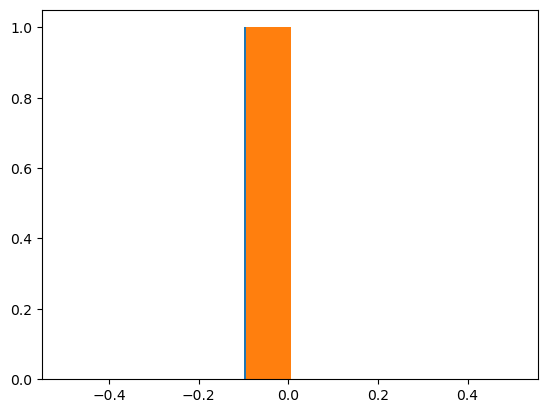

In [110]:
plt.hist(office1)
plt.hist(office2)

In [111]:
from scipy import stats
from pydataset import data

In [112]:
office_one = stats.norm(90, 15)
office_two = stats.norm(100, 20)

In [113]:
dist_one = office_one.rvs(40)
dist_two = office_two.rvs(50)

In [115]:
dist_one.var(), dist_two.var()

(262.0807621971434, 458.86090943362376)

In [116]:
stats.levene(dist_one, dist_two)

LeveneResult(statistic=0.4428292043999735, pvalue=0.5075005260197754)

In [119]:
t, p = stats.ttest_ind(dist_two, dist_one, equal_var=False)
t, p

(1.688031764751321, 0.09495555821049692)

Null: There's no diference between the two distrtibutions
Alternative: there's a significant difference between the two distributions

In [120]:
alpha = .05

if p <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')
    # 

Fail to reject null


Takeaway: we rejected the null hypothesis, there is a signficant difference between the two offices

3. Load the mpg dataset and use it to answer the following questions:

In [1]:
#import seaborn as sns
#mpg = sns.load_dataset('mpg')
from pydataset import data
mpg = data('mpg')
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env


- Is there a difference in fuel-efficiency in cars from 2008 vs 1999? Independent Test

In [27]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [26]:
alpha = .05

In [3]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [4]:
mpg.isna().sum()

mpg = mpg[~mpg.hwy.isna()]
mpg = mpg[~mpg.year.isna()]
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

<AxesSubplot:>

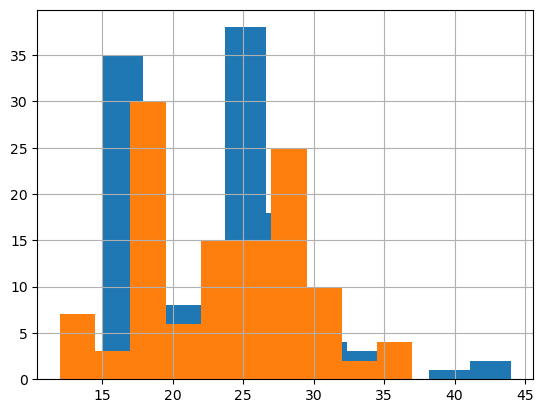

In [16]:
mpg[mpg.year==1999].hwy.hist()
mpg[mpg.year==2008].hwy.hist()

In [17]:
ninety_nine = mpg[mpg.year==1999].hwy
zero_eight = mpg[mpg.year==2008].hwy

In [25]:
zero_eight.head()
#ninety_nine.head()

3     31
4     30
7     27
10    28
11    27
Name: hwy, dtype: int64

In [20]:
stats.levene(ninety_nine, zero_eight)

LeveneResult(statistic=0.0212016152523693, pvalue=0.8843574825616618)

In [22]:
t, p = stats.ttest_ind(ninety_nine, zero_eight, equal_var=False)

if p < .05:
    print('There is a significant difference between the fuel-efficiency of vehicles in 1999 and 2008')
else:
    print('We fail to find a signficant difference')

We fail to find a signficant difference


In [122]:
mpg['fuel_eff'] = (mpg['cty'] + mpg['hwy']) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [125]:
new_eff = mpg[mpg['year'] == 2008]['fuel_eff']
old_eff = mpg[mpg['year'] == 1999]['fuel_eff']

In [126]:
new_eff.var(), old_eff.var()

(24.097480106100797, 27.122605363984682)

Null: there is no difference in fuel efficiency between cars made in 2008 and 1999
Alternative: there is a significant difference in fuel efficiency between cars made in 2008 and 1999

In [128]:
t2, p2 = stats.ttest_ind(new_eff, old_eff, equal_var=False)
t2, p2

(-0.21960177245940962, 0.8263750772060638)

In [129]:
alpha = .05

if p <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Fail to reject null


Takeaway: we failed to reject the null hypothesis, there is no signficant difference in fuel efficiency between cars made in 1999 and 2008.

- Are compact cars more fuel-efficient than the average car? one-sample test, 1-tail

In [37]:
mpg.isna().sum()
mpg = mpg[~mpg.hwy.isna()]
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [42]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

<AxesSubplot:>

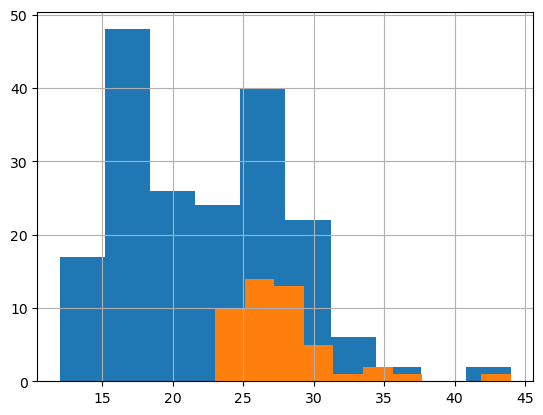

In [46]:
mpg[mpg['class'] != 'compact'].hwy.hist()
mpg[mpg['class'] == 'compact'].hwy.hist()

In [48]:
normal_car = mpg[mpg['class'] != 'compact'].hwy
compact_car = mpg[mpg['class'] == 'compact'].hwy

In [49]:
stats.levene(normal_car, compact_car)

LeveneResult(statistic=20.48883757052893, pvalue=9.586415103710692e-06)

In [50]:
t, p = stats.ttest_ind(normal_car, compact_car, equal_var=False)

if p < .05:
    print('There is a significant difference between the fuel-efficiency of normal cars and compact cars')
else:
    print('We fail to find a signficant difference')

There is a significant difference between the fuel-efficiency of normal cars and compact cars


null: compact cars are not more efficeint than the average car
alternative: compact cars are more efficient than the average car

In [132]:
compact_eff = mpg[mpg['class'] == 'compact']['fuel_eff']
mean_eff = mpg['fuel_eff'].mean()


In [134]:
t3, p3 = stats.ttest_1samp(compact_eff, mean_eff)
t3, p3

(7.896888573132533, 4.198563794317163e-10)

In [135]:
alpha = .05

if t3 > 0 and p3/2 <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Reject null


Takeaway: reject the null hypothesis, compact cars are significantly more efficient than the average car

- Do manual cars get better gas mileage than automatic cars? Independent test, 1-tail

In [55]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

<AxesSubplot:>

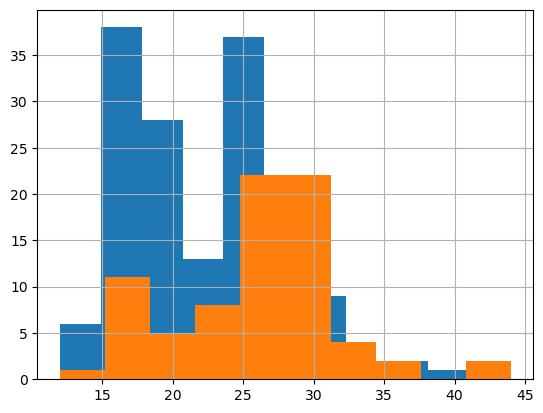

In [62]:
mpg[mpg['trans'].str.startswith('a')].hwy.hist()
mpg[mpg['trans'].str.startswith('m')].hwy.hist()

In [95]:
automatic = mpg[mpg['trans'].str.startswith('a')].hwy
manual = mpg[mpg['trans'].str.startswith('m')].hwy

In [98]:
automatic.head()

1    29
4    30
5    26
7    27
9    25
Name: hwy, dtype: int64

In [97]:
stats.levene(automatic, manual)

LeveneResult(statistic=1.190286842268245, pvalue=0.2764034768395809)

In [99]:
t, p = stats.ttest_ind(automatic, manual, equal_var=False)

if p < .05:
    print('There is a significant difference between the fuel-efficiency of automatic and manual transmissions')
else:
    print('We fail to find a signficant difference')

There is a significant difference between the fuel-efficiency of automatic and manual transmissions


Null: manual cars are not more efficient than automatics
Alternative: manual cars are more efficient than automatics

In [136]:
manual_eff = mpg[mpg['trans'].str.startswith('m')]['fuel_eff']
auto_eff = mpg[mpg['trans'].str.startswith('a')]['fuel_eff']

In [137]:
manual_eff.var(), auto_eff.var()

(26.635167464114826, 21.942777233382337)

In [138]:
t4, p4 = stats.ttest_ind(manual_eff, auto_eff, equal_var=False)
t4, p4

(4.443514012903072, 1.7952248999917893e-05)

In [139]:
alpha = .05

if t4 > 0 and p4/2 < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Reject null


Takeaway: manual cars are significantly more efficient than automatic cars